# Astropy
Astropy is a package dedicated to Astronomy and Astrophysics.

In [ ]:
import matplotlib.pyplot as plt

## Constants and Equations

In [2]:
# Importing Essential Packages
from astropy import constants as const # Universal Constants
from astropy import units as u # Units (unit conversion)

In [ ]:
print(const.G)
print('\n')
print(const.c)
print('\n')
print(const.c.to('km/s'))

Recall that:
$$
    F = \frac{GMm}{r^2}
$$

In [ ]:
# Compute force due to gravity of Sun on Earth
F = (const.G * const.M_sun * const.M_earth) / (const.au) ** 2 
# Give force in Newtons
print(F.to(u.N)) 
print(F) 
print(F.unit)

In [ ]:
# We can assign types with multiplication
list = [1, 2, 3]
listInM = list * u.m
print(listInM)
print(listInM.unit)
print(listInM.to(u.mm))

# TODO: Compute k
Recall Kepler's Third Law of Planetary Motion:
$$
    \frac{r^3}{T^2} = k
$$
Give your answer is `pc^3 / yr^2`

In [3]:
# Put your code here
k = (u.au ** 3) / (u.yr ** 2)
k.to(u.pc ** 3 / u.year ** 2)

1.1395269492043442e-16

## Reading & Writing File
.fits files are a common way to store data in astronomy

In [ ]:
# Importing Essential Packages
from astropy.table import Table # Astropy works with .fits files

In [ ]:
glh = Table.read("data/galah_dr4_trimmed.fits", format="fits", hdu=1)

In [ ]:
# Write the data
glh.write('data/galah_dr4_trimmed_new.fits', format='fits')

In [ ]:
glh.colnames

In [ ]:
plt.plot(glh['teff'], glh['logg'], 'x', markersize=0.2)

plt.title("HR Diagram")
plt.xlabel("teff")
plt.ylabel("logg")
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

## Models & Fitting

In [29]:
import numpy as np
from astropy.modeling import models, fitting

In [ ]:
# Fitting a Gaussian to existing data
tmp = glh[glh['logg'] < 3]
plt.plot(tmp['teff'], tmp['logg'], 'x', markersize=0.2)

plt.title("HR Diagram")
plt.xlabel("teff")
plt.ylabel("logg")
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

In [ ]:
# Line of Best Fit
model = models.Linear1D()
fitter = fitting.LinearLSQFitter()
best_fit = fitter(model, tmp['teff'], tmp['logg'])
print(best_fit)

In [ ]:
plt.plot(tmp['teff'], tmp['logg'], 'x', markersize=0.2)
plt.plot(tmp['teff'], best_fit(tmp['teff']))

plt.title("HR Diagram")
plt.xlabel("teff")
plt.ylabel("logg")
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

In [ ]:
# Polynomial of Best Fit
odel_poly = models.Polynomial1D(degree=3)
fitter_poly = fitting.LinearLSQFitter() 
best_fit_poly = fitter_poly(odel_poly, tmp['teff'], tmp['logg'])
print(best_fit_poly)

In [ ]:
plt.plot(tmp['teff'], tmp['logg'], 'x', markersize=0.2)
plt.plot(tmp['teff'], best_fit_poly(tmp['teff']), 'r+')

plt.title("HR Diagram")
plt.xlabel("teff")
plt.ylabel("logg")
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

In [30]:
# Gaussian
mu, sigma, amplitude = 0.0, 10.0, 10.0
N = 100
x = np.linspace(-30, 30, N)
y = amplitude * np.exp(-(x-mu)**2 / (2*sigma**2))
y = np.array([y_point + np.random.normal(0, 1) for y_point in y])   #Another way to add random gaussian noise
sigma = 1

In [ ]:
model_gauss = models.Gaussian1D()
fitter_gauss = fitting.LevMarLSQFitter()
best_fit_gauss = fitter_gauss(model_gauss, x, y)

plt.plot(x, y, 'r+')
plt.plot(x, best_fit_gauss(x), 'g-', linewidth=1, label='astropy.modeling')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

# TODO: Try to fit x and y with a polynomial regressor

In [31]:
# Put your code here
odel_poly = models.Polynomial1D(degree=3)
fitter_poly = fitting.LinearLSQFitter()
best_fit_poly = fitter_poly(odel_poly, x, y)
print(best_fit_poly)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
            c0                  c1          ...           c3         
    ----------------- --------------------- ... ---------------------
    7.767976073330273 -0.013304991266196612 ... 2.952149326237159e-05


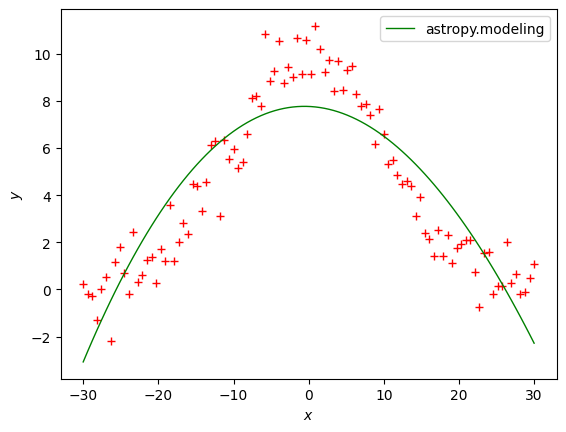

In [32]:
plt.plot(x, y, 'r+')
plt.plot(x, best_fit_poly(x), 'g-', linewidth=1, label='astropy.modeling')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

## Bonus Astropy Functionality Worth Exploring
- Look into Chi-squared Test for assessing fit
    - Need to include uncertainty as an additonal parameter

# Gala 
Gala is used to explore the orbits of Stars
This guide is based on: [Computing Galactic Orbits of Stars with Gala](https://learn.astropy.org/tutorials/gaia-galactic-orbits.html)

In [7]:
# Importing Essential Packages
from astropy.table import Table # Astropy works with .fits files
import matplotlib.pyplot as plt 
from astropy import units as u # Units (unit conversion)

In [8]:
# 4096 random stars within 100 pc (or with a parallax > 10 mas) of the Sun
gaia_data = Table.read("data/gaia_data.fits", format="fits", hdu=1)

In [9]:
gaia_data

ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
deg,deg,mas,mas / yr,mas / yr,km / s,mag,mag,mag
float64,float64,float64,float64,float64,float64,float32,float32,float32
256.8370985186671,46.5081010273448,10.770964834345387,-19.76657104695835,55.92605676622464,-17.673072044811907,12.956913,14.192928,11.859498
129.45826809010867,-6.806694022293258,41.081670013380716,-297.34595349374183,43.83424795415093,35.53814452290586,6.576352,6.931065,6.111273
2.317856723637118,9.00699655780345,17.824765284426462,-171.8278607514459,-1083.8740928197751,-148.91780163518774,13.119075,13.968703,12.223303
330.41287472805976,51.88897801553169,13.0756133009657,-85.30745872006916,-34.23366534215265,-28.726469345049587,12.101919,13.0526495,11.149786
147.19500733390703,64.89446697480156,16.93304725892566,2.382528916102615,35.3422776993022,-19.67434662793379,7.00129,7.2429867,6.664537
80.2154121697551,-4.698409026669147,10.952733453482963,94.43034433086909,-51.11033017381004,23.14373705062893,11.307271,11.843748,10.633876
130.85357387757685,-44.02677884321,10.279167265645267,-25.154708979027845,17.61973693017641,40.91502127360303,10.926985,11.411972,10.315131
339.83848696327334,57.35583655498077,11.431122594578381,-88.0760523216923,-46.024711850345625,1.0253186600965876,11.903913,12.650127,11.08852


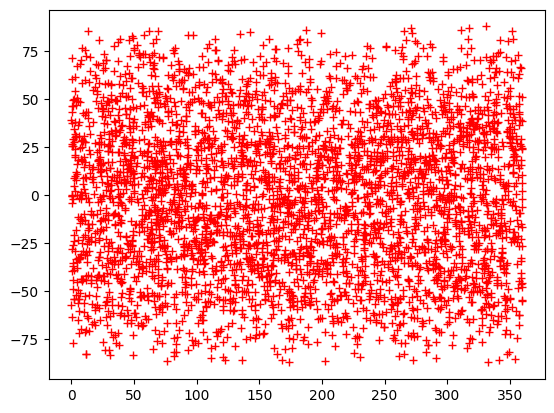

In [10]:
# Position of stars
plt.plot(gaia_data['ra'], gaia_data['dec'], 'r+')

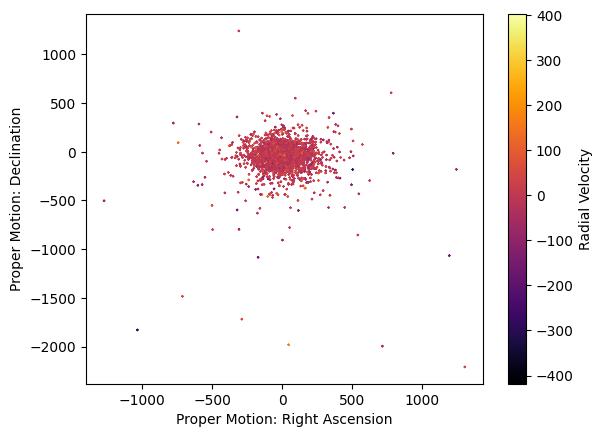

In [11]:
# Velocity + Radial Velocity of Stars
plt.scatter(gaia_data['pmra'], gaia_data['pmdec'], c=gaia_data['radial_velocity'], marker='x', cmap=plt.cm.inferno, s=1)
cbar = plt.colorbar()
plt.xlabel("Proper Motion: Right Ascension")
plt.ylabel("Proper Motion: Declination")
cbar.set_label("Radial Velocity")

## Determine Galactic Stellar Orbits with Gala
### Converting Data Into Correct Coordinates

In [12]:
# Import Essential Packages
import gala.potential as gp
import gala.dynamics as gd
import astropy.coordinates as coord
import numpy as np

In [13]:
dist = coord.Distance(parallax=u.Quantity(gaia_data['parallax']))
# Furthest and closest star
dist.min(), dist.max()

(<Distance 8.79909291 pc>, <Distance 99.99985292 pc>)

In [14]:
# Converts helocentric, spherical values to Galatocentric, Cartesian values
c = coord.SkyCoord(ra=gaia_data['ra'], 
                   dec=gaia_data['dec'],
                   distance=dist,
                   pm_ra_cosdec=gaia_data['pmra'], 
                   pm_dec=gaia_data['pmdec'],
                   radial_velocity=gaia_data['radial_velocity'])

In [15]:
# Gets the parameters that we need to shift c by
coord.Galactocentric()

<Galactocentric Frame (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg)>

In [16]:
# c is coordinates centered about centre of the Solar System
# transform moves to be at the centre of the Milkway
galcen = c.transform_to(coord.Galactocentric(z_sun=0*u.pc, galcen_distance=8.1*u.kpc))

Text(0, 0.5, '$v_y$ [$\\mathrm{km\\,s^{-1}}$]')

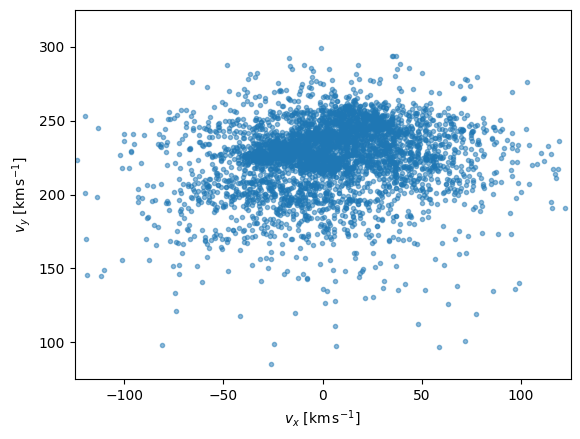

In [17]:
plt.plot(galcen.v_x.value, galcen.v_y.value, marker='.', linestyle='none', alpha=0.5)

plt.xlim(-125, 125)
plt.ylim(200-125, 200+125)


plt.xlabel('$v_x$ [{0:latex_inline}]'.format(u.km/u.s))
plt.ylabel('$v_y$ [{0:latex_inline}]'.format(u.km/u.s))

### Integrate Galactic Orbits

In [18]:
milky_way = gp.MilkyWayPotential()
milky_way
# We can could use a different disk mass to compute 
# different_disk_potential = gp.MilkyWayPotential(disk=dict(m=8e10*u.Msun))
# different_disk_potential

<CompositePotential disk,bulge,nucleus,halo>

In [19]:
H = gp.Hamiltonian(milky_way)

In [20]:
# Integrate orbits with H.integrate_orbit
# Compute where the star lies on Phase Space Diagram
w0 = gd.PhaseSpacePosition(galcen.cartesian)
# Determine Orbit using Hamiltonian (increment by 1 Mega-Years, between 0 and 500 Mega-years)
orbit = H.integrate_orbit(w0, dt=1*u.Myr, t1=0*u.Myr, t2=500*u.Myr)

In [21]:
orbit.shape
# 500 rows (each star has 500 simulated phase space position)
# 4096 columns (each star has a column)

(500, 4096)

In [22]:
# Orbital Parameters
E = orbit.energy()
L = orbit.angular_momentum()
L.shape
# Shape represents (cartesian coordinates e.g. x, y, z, #simulations, which star)

(3, 500, 4096)

In [23]:
# Energy of the first star in each simulation step
E[:, 0]

<Quantity [-0.13506803, -0.135068  , -0.13506797, -0.13506794, -0.13506791,
           -0.13506788, -0.13506785, -0.13506782, -0.13506779, -0.13506777,
           -0.13506774, -0.13506772, -0.1350677 , -0.13506767, -0.13506765,
           -0.13506763, -0.13506761, -0.13506759, -0.13506757, -0.13506756,
           -0.13506754, -0.13506753, -0.13506751, -0.1350675 , -0.13506748,
           -0.13506747, -0.13506746, -0.13506744, -0.13506743, -0.13506742,
           -0.13506741, -0.1350674 , -0.13506739, -0.13506738, -0.13506738,
           -0.13506737, -0.13506736, -0.13506735, -0.13506735, -0.13506734,
           -0.13506733, -0.13506733, -0.13506732, -0.13506732, -0.13506732,
           -0.13506731, -0.13506731, -0.13506731, -0.13506731, -0.13506731,
           -0.13506731, -0.13506731, -0.13506731, -0.13506731, -0.13506732,
           -0.13506732, -0.13506732, -0.13506733, -0.13506734, -0.13506734,
           -0.13506735, -0.13506736, -0.13506737, -0.13506738, -0.13506739,
           -

In [24]:
# Angular Momentum in each simulation step
L[0, :, 0] # x direction
L[1, :, 0] # y direction
L[2, :, 0] # z direction

<Quantity [-1.93174925, -1.93174925, -1.93174925, -1.93174925, -1.93174925,
           -1.93174925, -1.93174925, -1.93174925, -1.93174925, -1.93174925,
           -1.93174925, -1.93174925, -1.93174925, -1.93174925, -1.93174925,
           -1.93174925, -1.93174925, -1.93174925, -1.93174925, -1.93174925,
           -1.93174925, -1.93174925, -1.93174925, -1.93174925, -1.93174925,
           -1.93174925, -1.93174925, -1.93174925, -1.93174925, -1.93174925,
           -1.93174925, -1.93174925, -1.93174925, -1.93174925, -1.93174925,
           -1.93174925, -1.93174925, -1.93174925, -1.93174925, -1.93174925,
           -1.93174925, -1.93174925, -1.93174925, -1.93174925, -1.93174925,
           -1.93174925, -1.93174925, -1.93174925, -1.93174925, -1.93174925,
           -1.93174925, -1.93174925, -1.93174925, -1.93174925, -1.93174925,
           -1.93174925, -1.93174925, -1.93174925, -1.93174925, -1.93174925,
           -1.93174925, -1.93174925, -1.93174925, -1.93174925, -1.93174925,
           -

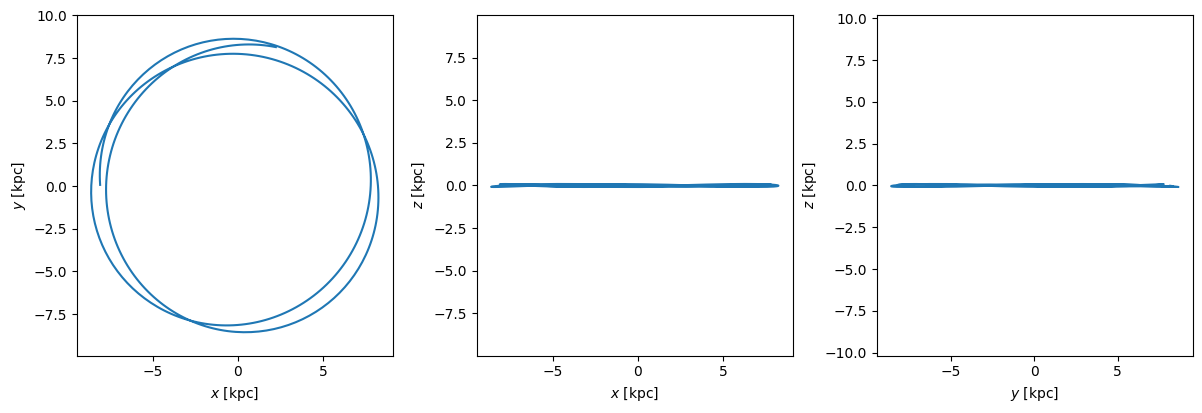

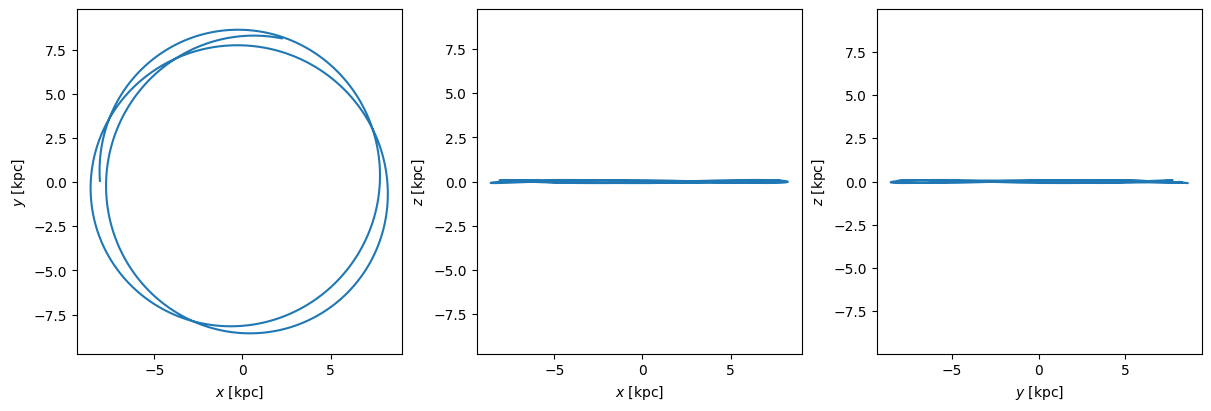

In [25]:
# If your Juypter Notebook shows [ * ], it means the kernel is busy, give it a few seconds :)
orbit[:, 0].plot() # [row, col], [:, 0] = get all rows in first column

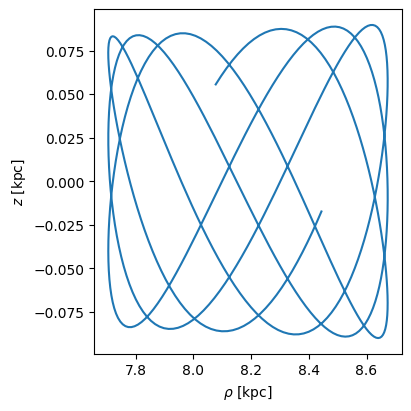

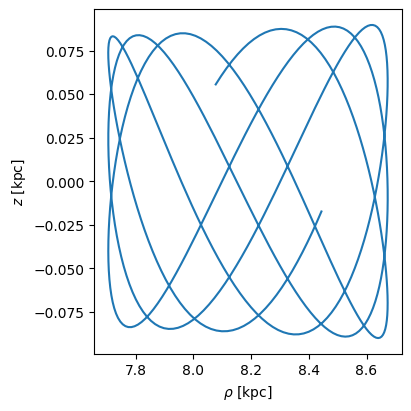

In [26]:
orbit[:, 0].cylindrical.plot(['rho', 'z'])

# TODO: Graph the orbit of another star 
- Note each start is a column in orbit
   - Plot x vs y 
   - Plot rho vs z

Read the [documentation](http://gala.adrian.pw/en/latest/tutorials.html)

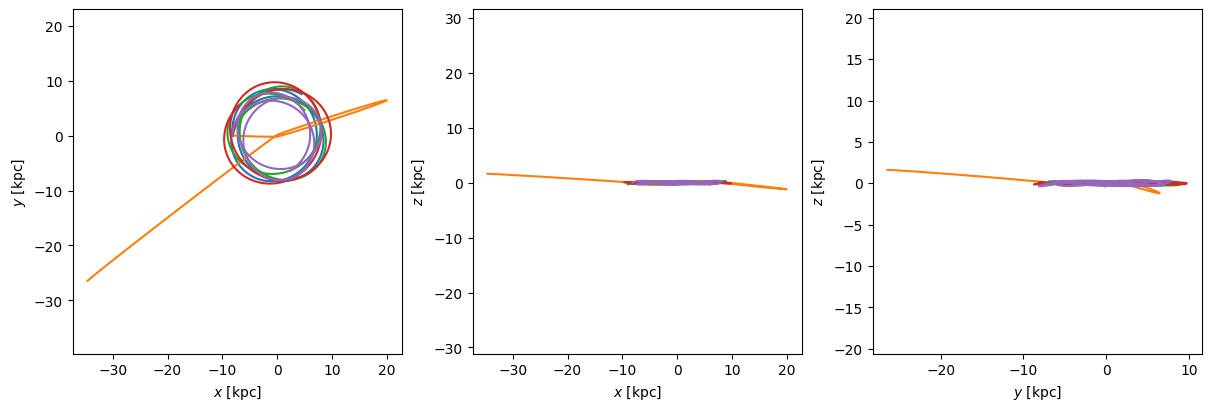

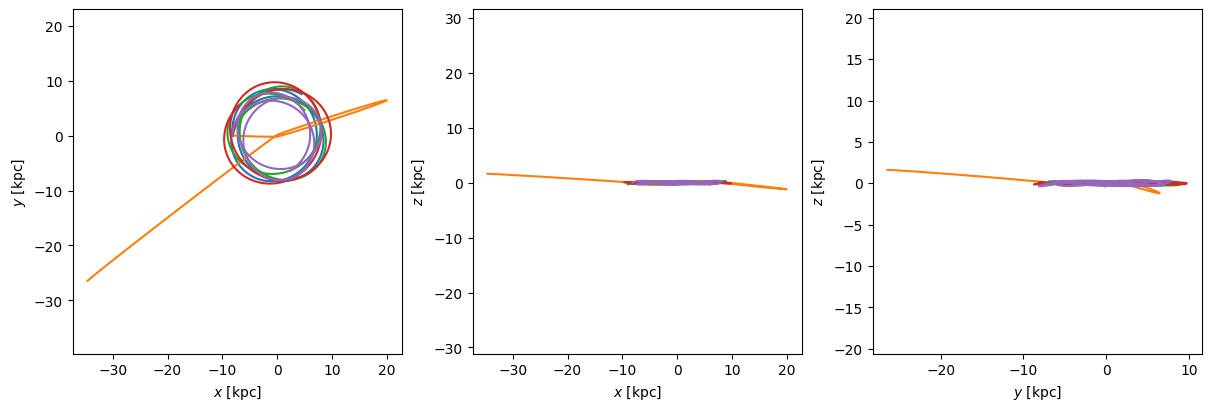

In [27]:
orbit[:, [1, 2, 3, 4, 5]].plot() # [row, col], [:, 0] = get all rows in first column